HIERARCHICAL CLUSTERING / AGGLOMERATIVE CLUSTERING / BOOTOM-UP APPROACH

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style = 'darkgrid')

In [155]:
xls = pd.ExcelFile(r"F:\Krishna\Excel R\Data Scientist\Assignments\Clustering\EastWestAirlines.xlsx")
df1 = pd.read_excel(xls, 'Description')
df = pd.read_excel(xls, 'data')

In [156]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [157]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


<Axes: >

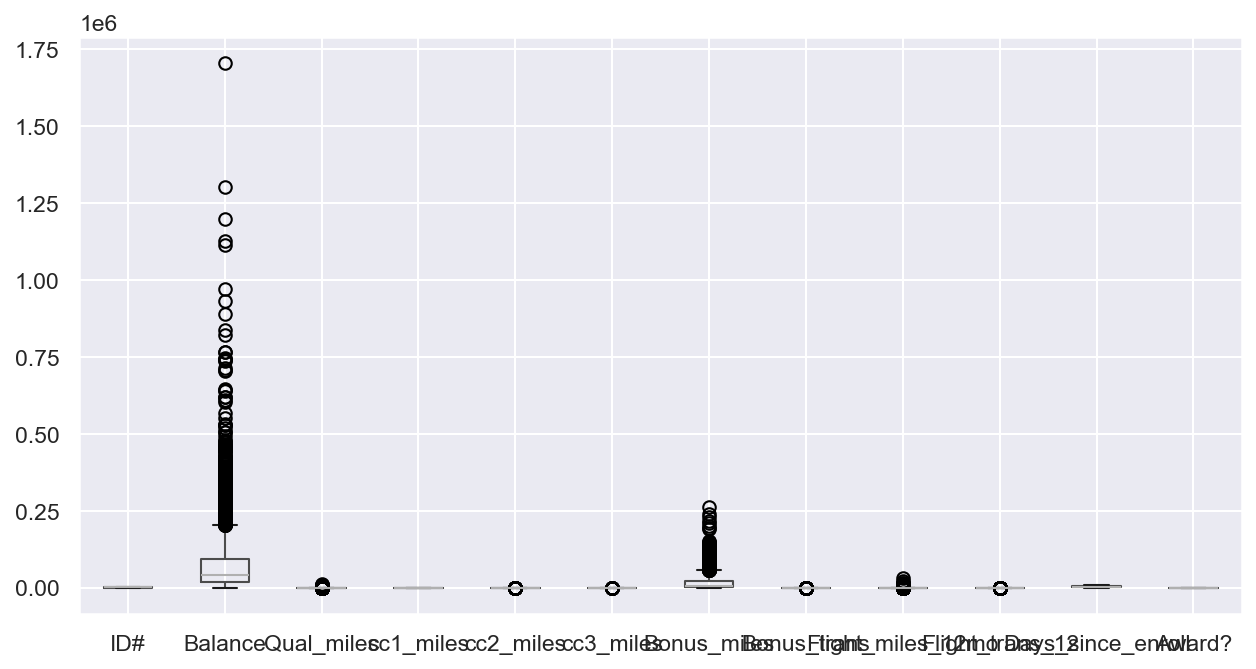

In [159]:
df.boxplot()

<Axes: >

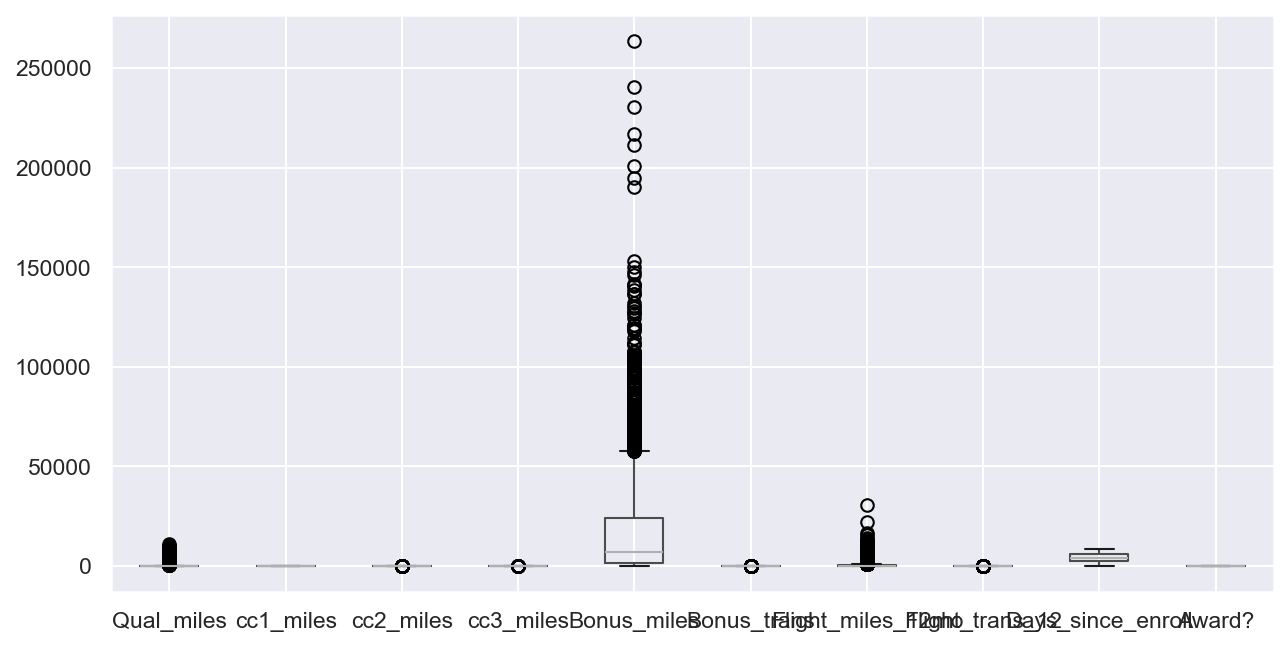

In [16]:
df.iloc[:,2:].boxplot()

Few of our columns do have outliers but as as its a real time data, if we replace outliers with median or mode values, it can affect the real time data and can be possible the outlier data points can make a different cluster together. Therefore, we are keeping the Outliers as it is.

In [160]:
df.drop(columns = ['ID#'], inplace = True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df)

In [46]:
x = pd.DataFrame(x, columns = df.columns)
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


Our data is ready, Let's create dendrogram

In [47]:
from scipy.cluster import hierarchy

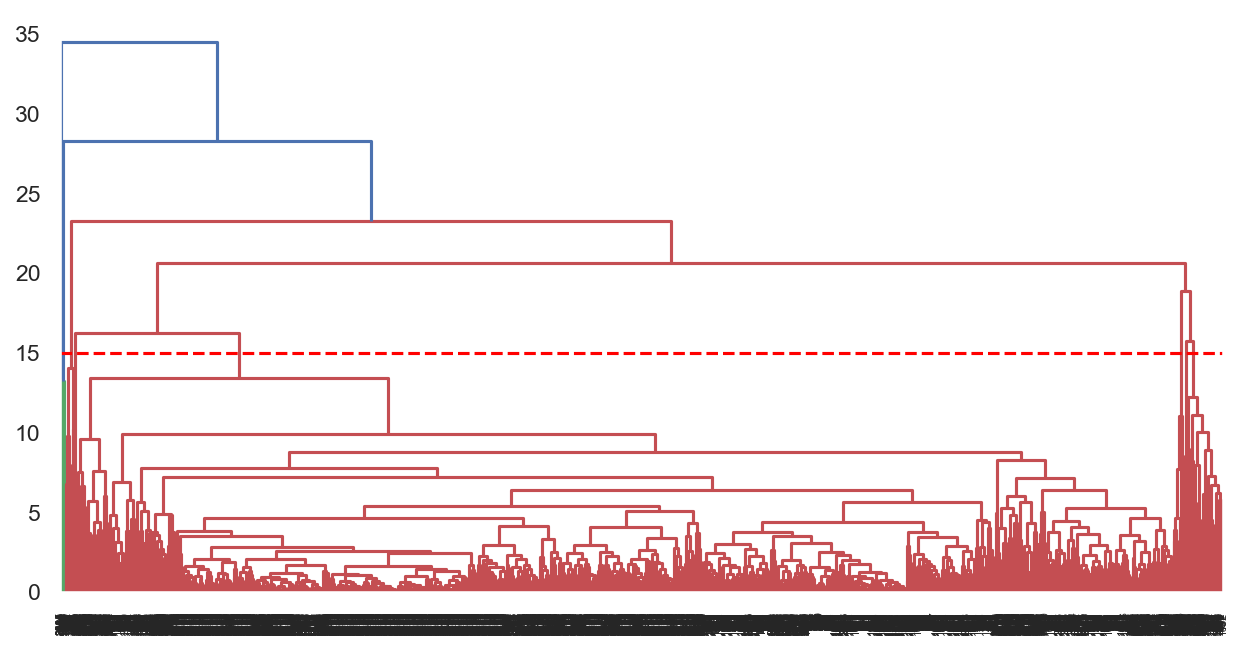

In [49]:
lk = hierarchy.linkage(x, method = 'complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 15, linestyle = '--', color = 'red')


with red dotted line crossing from y = 15 , having almost 7 intersections. means will make 7 clusters , which will be moderately Same or Homogeneous.

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
hc = AgglomerativeClustering(n_clusters = 7)     
ypred = hc.fit_predict(x)
ypred

array([1, 1, 1, ..., 0, 6, 6], dtype=int64)

In [51]:
len(ypred)

3999

In [52]:
df['Cluster'] = ypred

In [53]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,6


As we have created total 7 clusters, let's find out what are the similarities between customers in same cluster.

In [55]:
df.groupby('Cluster').agg(('mean'))

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,116758.363636,37.024351,3.672890,1.000000,1.000000,38535.185065,18.683442,339.391234,1.029221,4756.469968,0.672078
1,57790.446328,8.602098,1.211461,1.000000,1.000000,5211.833737,7.789346,357.041162,1.093624,5148.475383,0.364003
2,134880.892308,393.323077,2.430769,1.000000,1.000000,36582.169231,29.338462,5915.523077,16.638462,4599.607692,0.753846
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
5,110219.330769,3502.323077,1.861538,1.000000,1.000000,17226.661538,11.092308,727.153846,2.269231,4161.053846,0.600000
6,34564.370340,9.466446,1.277548,1.000000,1.000000,4515.278376,6.002486,68.813587,0.242751,2353.636288,0.000000


<Axes: xlabel='Balance', ylabel='Qual_miles'>

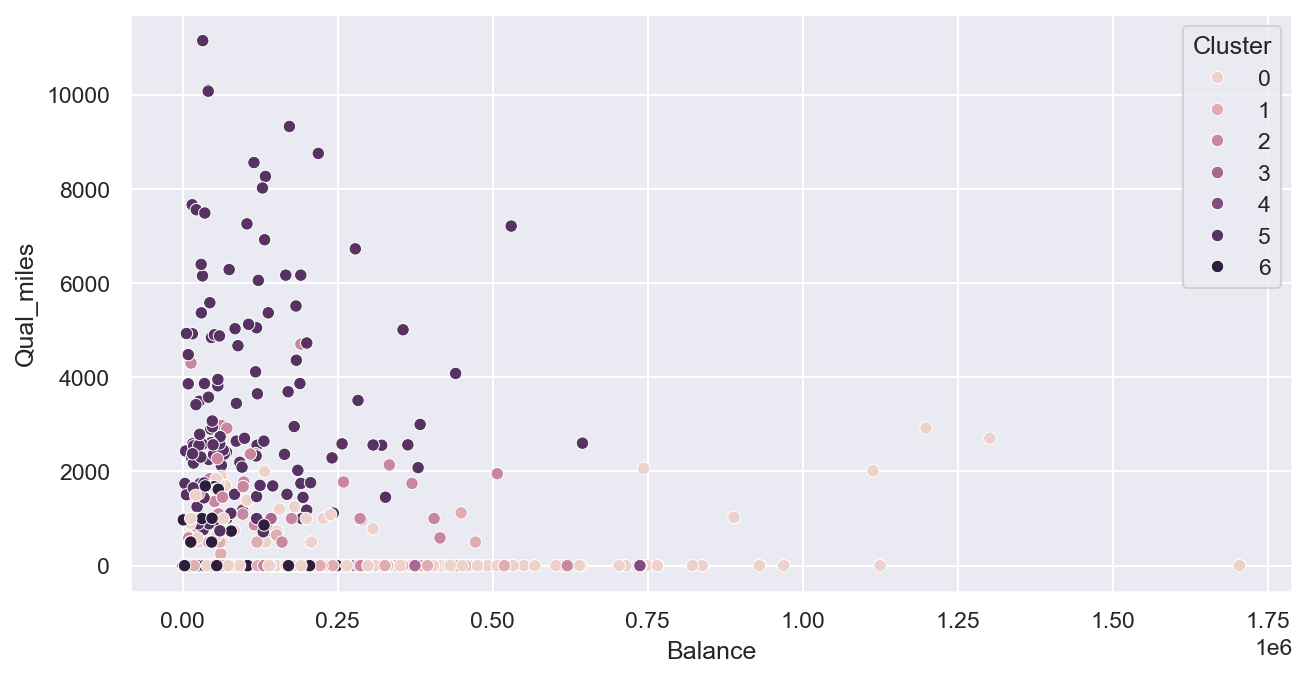

In [56]:
sns.scatterplot(x = df['Balance'], y = df['Qual_miles'], hue = df['Cluster'])

From above chart we can conclude that, Cluster 0 and 1 includes customers having avg. to max balance but least Qual_miles. and accordingly cluster 5 is the one including customers having avg balance with Highest Qual_miles.

<Axes: xlabel='Flight_miles_12mo', ylabel='Flight_trans_12'>

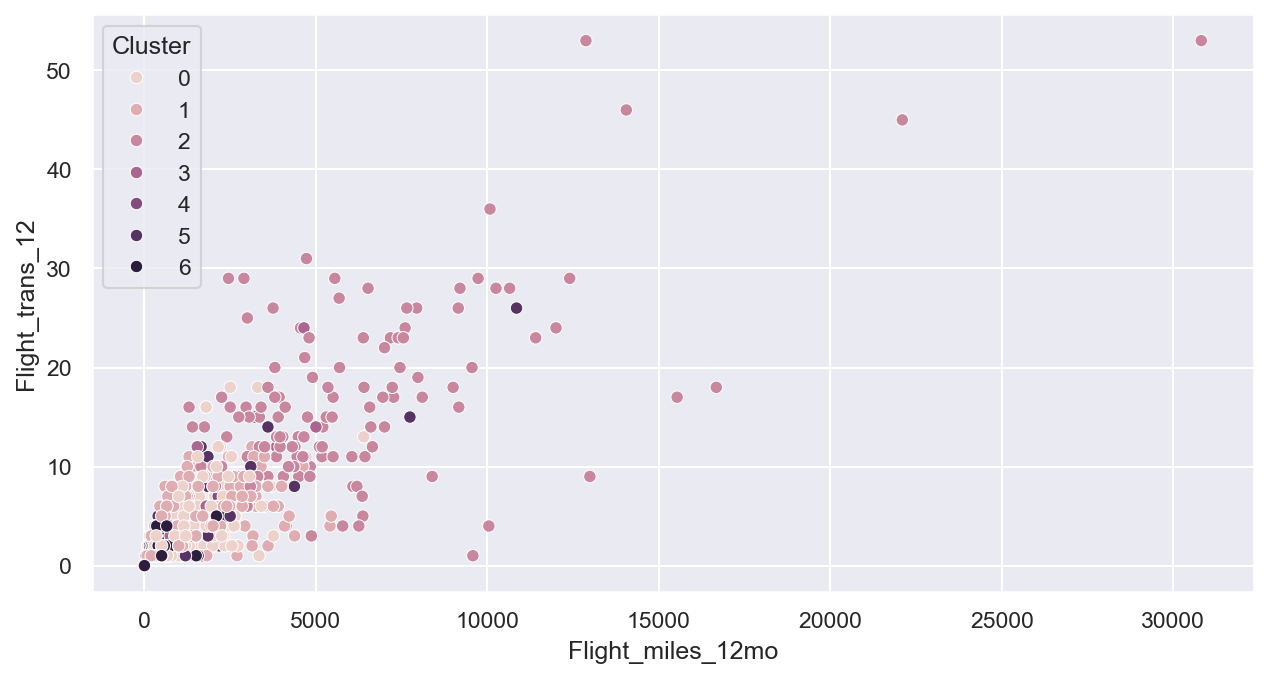

In [57]:
sns.scatterplot(x = df['Flight_miles_12mo'], y = df['Flight_trans_12'], hue = df['Cluster'])

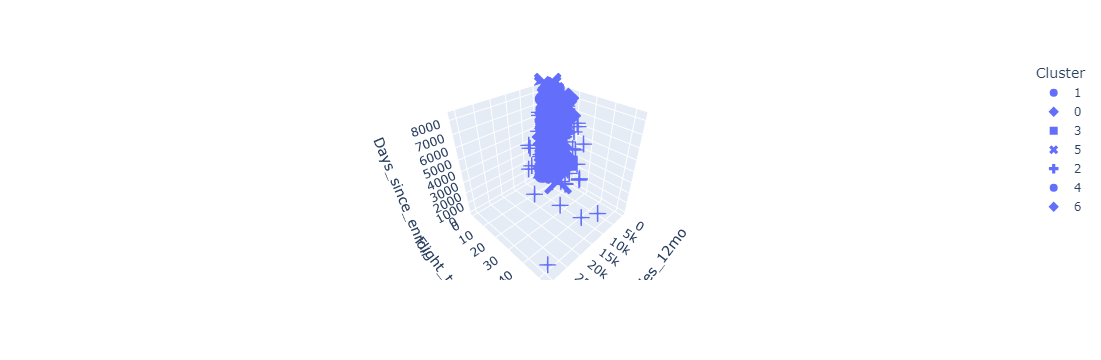

In [59]:
import plotly.express as pe
pe.scatter_3d(data_frame = df, x = 'Flight_miles_12mo', y = 'Flight_trans_12', z = 'Days_since_enroll', symbol = 'Cluster')

From above charts, we can see that only Cluster 2 is the one having highest no. of Flight miles and Flight transactions in past 12 months. Therefore, Customers in Cluster 2 are definitely important Customers.

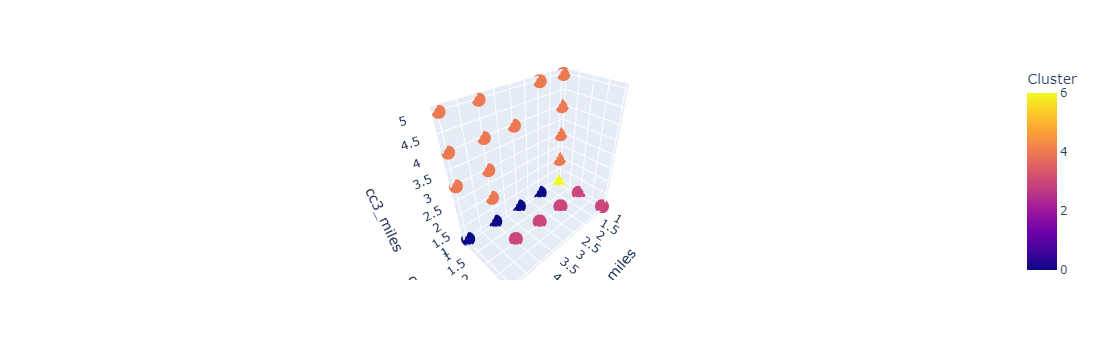

In [60]:
pe.scatter_3d(data_frame = df, x = 'cc1_miles', y = 'cc2_miles', z = 'cc3_miles', color = 'Cluster')

-  We can clearly see from above graph that in clusters 2 and 3 , there are customers who have mostly used Freq. Flyer credit card and earned miles in past 12 months.
-  In clusters 0 and 1, there are customers who have used Rewards Credit card.
-  In Clusters 4 and 5 , there are customers who used Small business Credit cards.
-  and at last, in cluster 6 , there are customers who used all the 3 credit cards and earned miles in past 12 months.

K-means Clustering

In [65]:
xls = pd.ExcelFile(r"F:\Krishna\Excel R\Data Scientist\Assignments\Clustering\EastWestAirlines.xlsx")
df1 = pd.read_excel(xls, 'Description')
df = pd.read_excel(xls, 'data')

In [66]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [67]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [68]:
x = pd.DataFrame(x, columns = df.columns)
x

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [69]:
x.drop(columns = 'ID#', inplace = True)
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [70]:
from sklearn.cluster import KMeans

In [71]:
km = KMeans()      #by default it will make 8 clusters
yp = km.fit_predict(x)           
yp

array([0, 0, 0, ..., 2, 5, 5])

In [72]:
len(yp)

3999

In [73]:
km.cluster_centers_

array([[-1.41881682e-01, -1.44066542e-01, -4.10492483e-01,
        -9.82418871e-02, -5.75234668e-02, -4.52807302e-01,
        -3.32246856e-01, -2.04540626e-01, -2.26422463e-01,
         7.33632445e-01, -7.66919299e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [-1.58351992e-01, -6.39422218e-02, -2.64291598e-01,
        -9.82418871e-02, -6.27665798e-02, -2.72200035e-01,
        -1.08475934e-01, -3.54808485e-02, -3.52893485e-02,
         7.00450665e-02,  1.30391816e+00],
       [ 1.17328261e+00,  4.64307965e-01,  1.87882676e-01,
        -9.82418871e-02, -6.27665798e-02,  7.19038227e-01,
         1.79997564e+00,  3.88703002e+00,  4.18404797e+00,
         2.51413402e-01,  8.64649608e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

Text(0.5, 1.0, 'Visualizing Clusters')

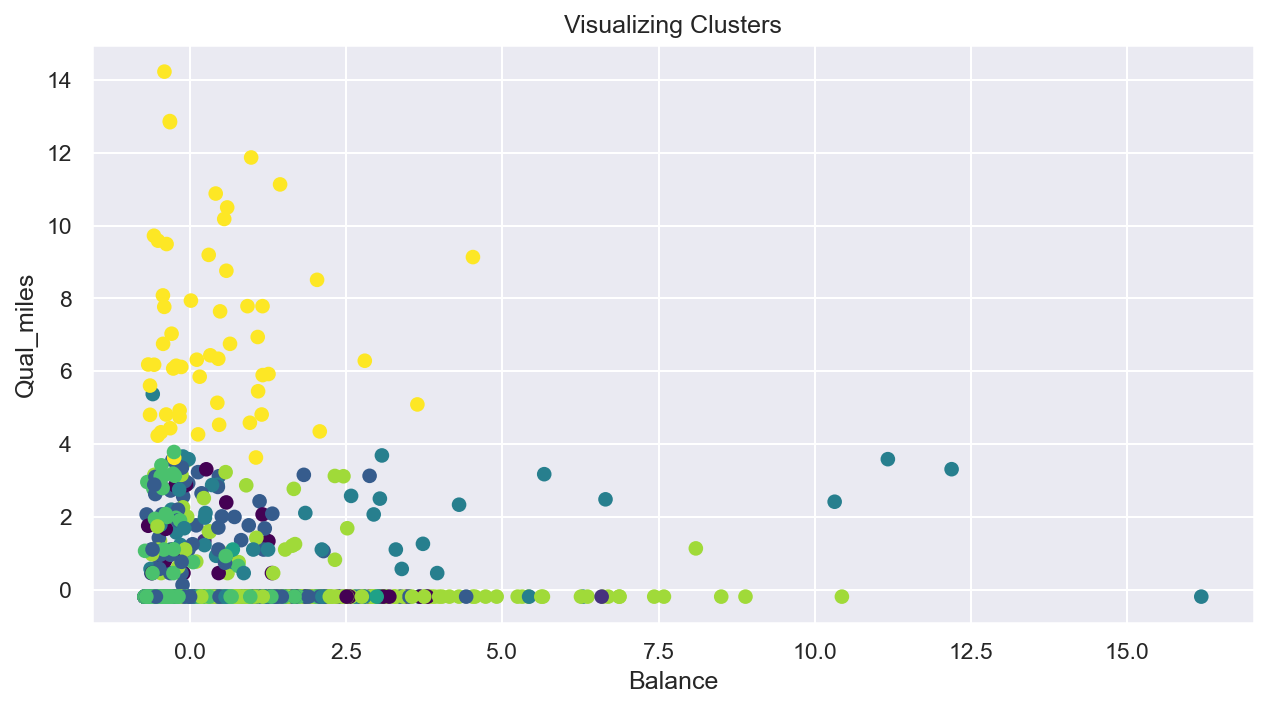

In [75]:
plt.scatter(x['Balance'], x['Qual_miles'], c = yp, cmap = 'viridis' )         # c parameter is just work of hue in seaborn
plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('Visualizing Clusters')

As we have multi-dimensional data we can't visualize the same via scatterplot properly, but it is giving us the same result as Hierarchical clustering. The cluster with yellow color represents 2nd cluster from Hierarchical Clustering.

In [76]:
km.inertia_     

17317.767575859518

Inertia should be close to 0. Therefore, we definitely have to find proper no. of clusters. Let's draw elbow graph for the same.

In [91]:
WCSS = []

for i in range(1,41):
    km = KMeans(n_clusters= i)
    km.fit_predict(x)
    WCSS.append(km.inertia_)

In [92]:
WCSS

[43988.999999999985,
 35409.5166298613,
 30899.246824652193,
 27154.04072350362,
 24883.727181458242,
 23248.929124761344,
 19165.861458655658,
 17317.742932870515,
 15960.424188770634,
 14732.22988234744,
 13705.179480519557,
 13162.31807391046,
 12494.243805692251,
 11971.887553442239,
 11517.378698458517,
 11157.841028754632,
 10769.987076315385,
 10422.232602693537,
 10103.11823437346,
 9782.519429836255,
 9464.834088920517,
 9251.235793094856,
 8868.278163154624,
 8760.451956258446,
 8669.143197248179,
 8377.759532197191,
 8208.765742900167,
 8045.373072030978,
 7916.76376030567,
 7796.762251373677,
 7648.667291934846,
 7530.351337358114,
 7324.142109863316,
 7301.421320023495,
 7192.081098352662,
 7107.3896078501075,
 7017.646119616048,
 6877.080123422969,
 6784.810664218823,
 6686.407697728186]

Text(0.5, 1.0, 'Elbow Graph')

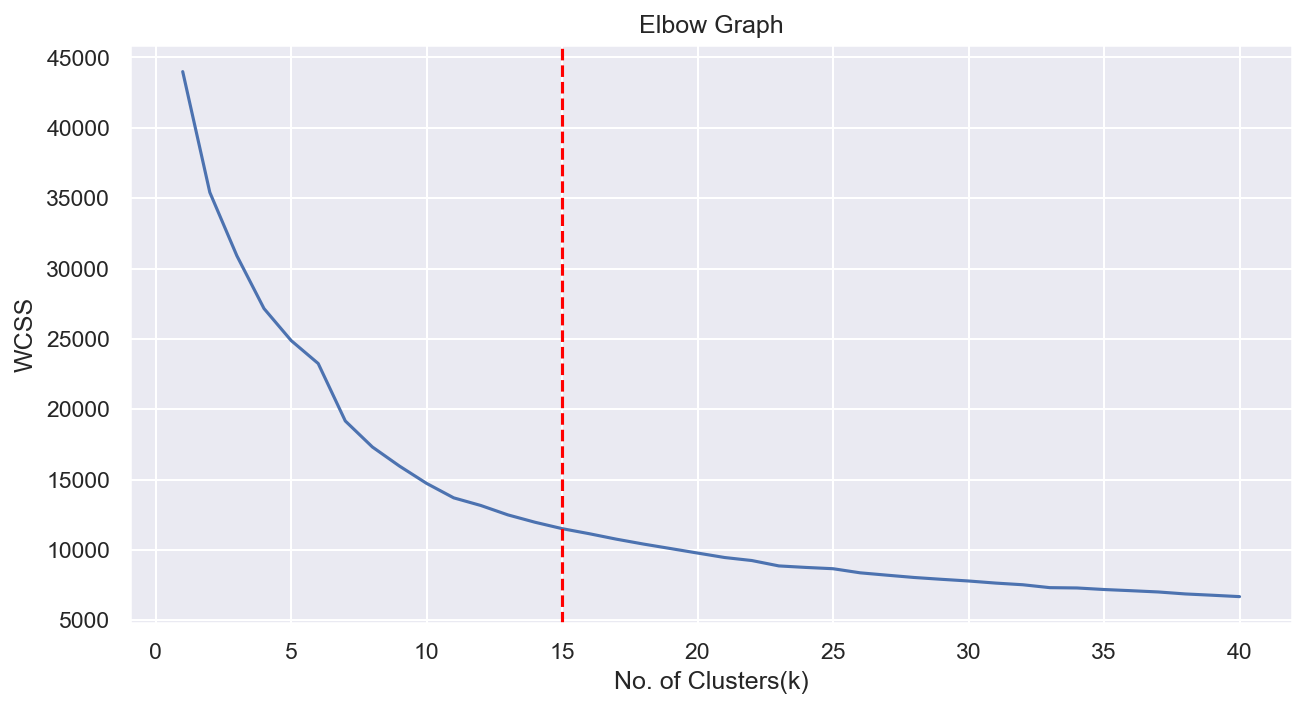

In [94]:
plt.plot(range(1,41), WCSS)
plt.axvline(x = 15, linestyle = '--', c = 'red')
plt.xlabel('No. of Clusters(k)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

Let's make a new model with no. of clusters = 15

In [95]:
km = KMeans(n_clusters = 15)
ypred = km.fit_predict(x)
ypred

array([11, 11, 11, ...,  4,  1,  1])

In [96]:
km.cluster_centers_

array([[-0.21208096, -0.10011784, -0.76957841, 13.44897558, -0.06276658,
         0.13523387,  0.76348339,  0.1661466 ,  0.48155865, -0.02083711,
         0.06141568],
       [-0.45161421, -0.13559084, -0.76007799, -0.09824189, -0.06276658,
        -0.62861355, -0.84328523, -0.25519159, -0.26529231, -1.02468987,
        -0.7669193 ],
       [ 0.79977358, -0.02612459,  2.0049469 , -0.09824189, -0.03969216,
         2.54334765,  1.29440139,  0.14803571,  0.20435459,  0.68603855,
         1.11735623],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [-0.08213306, -0.09953414,  1.02653607, -0.09824189, -0.06276658,
         0.51320486,  0.62330365, -0.16347327, -0.18358832,  0.20044434,
         1.30391816],
       [-0.18238429, -0.04807667, -0.65336244, -0.09824189, -0.06276658,
        -0.45790094, -0.46319706, -0.13654651, -0.12539711,  0.07373934,
         1.303

In [97]:
km.inertia_ 

11456.394630533057

Evaluation of K-means model

In [98]:
from sklearn.metrics import silhouette_score

In [99]:
silhouette_score(x,ypred)

0.2755071426478785

We have got much low accuracy, which can be there because of outliers. Let's remove outliers.

<Axes: >

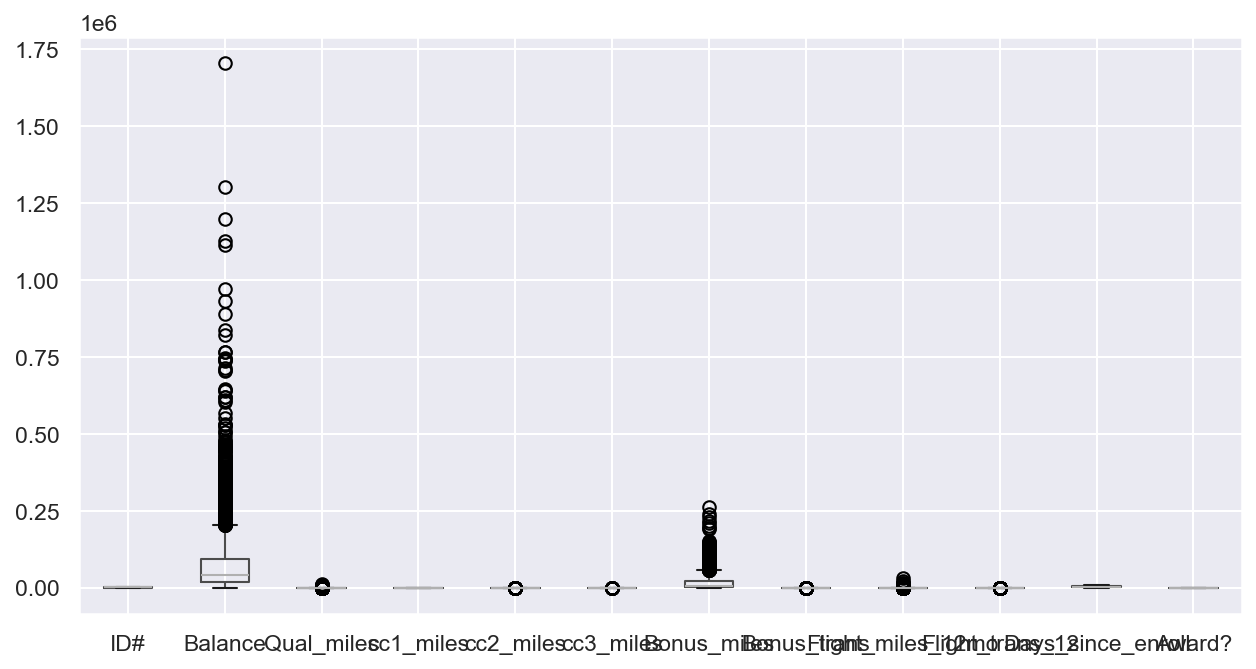

In [102]:
df.boxplot()

In [161]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [107]:
df.drop(columns = ['ID#'], inplace = True)

<Axes: >

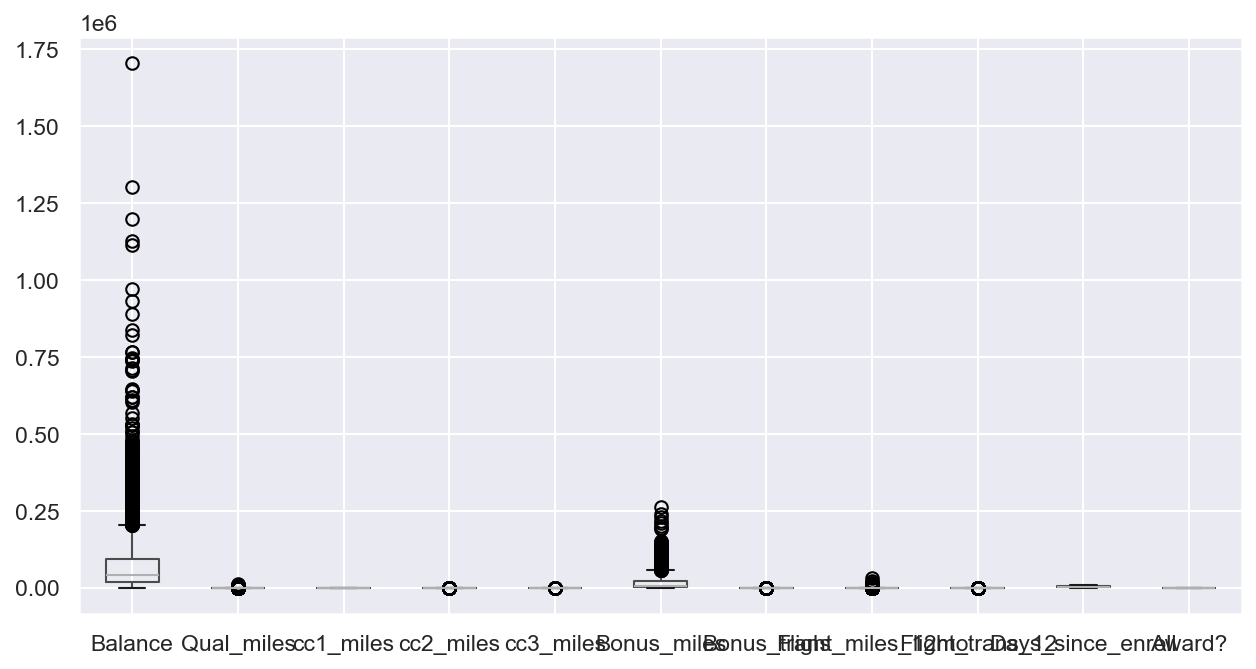

In [108]:
df.boxplot()

In [162]:
def outlier_detection(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5*iqr)
    upper = q3 + (1.5*iqr)
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [163]:
outlier_detection(df, 'Balance')

In [164]:
outlier_detection(df, 'Qual_miles')

In [165]:
outlier_detection(df, 'cc2_miles')

In [166]:
outlier_detection(df, 'cc3_miles')

In [167]:
outlier_detection(df, 'Bonus_miles')

In [168]:
outlier_detection(df, 'Bonus_trans')

In [169]:
outlier_detection(df, 'Flight_miles_12mo')

In [170]:
outlier_detection(df, 'Flight_trans_12')

<Axes: >

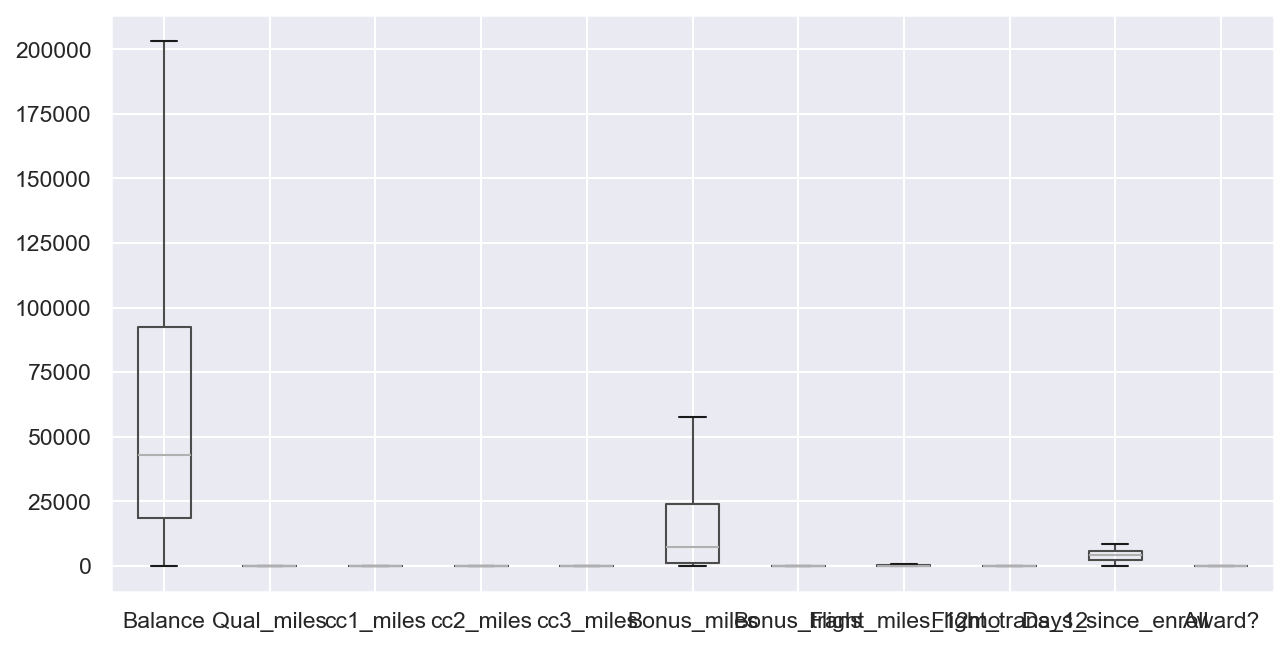

In [171]:
df.boxplot()

We have removed all the outliers, now let's build new model.

In [172]:
sc = StandardScaler()

In [173]:
x = sc.fit_transform(df)
x

array([[-0.60725829,  0.        , -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657,  0.        , -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963,  0.        , -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775,  0.        , -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163,  0.        , -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [133]:
km = KMeans(n_clusters = 15)
ypred = km.fit_predict(x)
ypred

array([10, 10, 10, ...,  7,  5,  9])

In [134]:
km.inertia_

7784.0033336675415

In [135]:
#evaluation matrix
silhouette_score(x, ypred)

0.25900923262319053

We are still getting much less accuracy. Let's do trial and error method for no. of clusters.

In [136]:
km = KMeans(n_clusters = 10)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, ..., 5, 0, 8])

In [138]:
silhouette_score(x, ypred)     #decreased

0.2580307101327838

In [139]:
km = KMeans(n_clusters = 7)
ypred = km.fit_predict(x)
ypred

array([3, 3, 3, ..., 0, 2, 2])

In [140]:
silhouette_score(x, ypred)   #decreased

0.24938968875559991

In [141]:
km = KMeans(n_clusters = 20)
ypred = km.fit_predict(x)
ypred

array([ 7,  7,  7, ..., 17,  3, 10])

In [142]:
silhouette_score(x, ypred)   #decreased

0.23915226180668533

In [143]:
km = KMeans(n_clusters = 15)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, ..., 5, 8, 2])

In [144]:
silhouette_score(x, ypred) 

0.25785431320992375

Hence, we can see that for this data the highest accuracy we are getting is 25.90% with no. of clusters = 15 with K-means clustering.

Now, let's compare clusters 

In [145]:
df['Cluster'] = ypred

In [146]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1,11
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1,11
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1,5
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0,8


In [147]:
df.groupby('Cluster').agg('mean') 

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,28400.898182,0.0,1.030909,1.0,1.0,1902.410909,3.920000,9.334545,0.049091,5616.732727,0.000000
1,161723.043103,0.0,4.431034,1.0,1.0,48831.679598,18.459770,66.080460,0.183908,5101.022989,0.120690
2,22310.609795,0.0,1.014218,1.0,1.0,1582.977883,2.304897,10.214850,0.050553,1916.154818,0.000000
3,173019.984252,0.0,1.448819,1.0,1.0,14716.149606,18.614173,732.535433,2.338583,5310.787402,0.818898
4,50634.069149,0.0,1.095745,1.0,1.0,7382.591755,8.712766,654.803191,2.122340,4017.090426,1.000000
5,37419.682432,0.0,2.814189,1.0,1.0,18189.871622,15.847973,24.945946,0.111486,4312.226351,1.000000
6,81911.775424,0.0,2.766949,1.0,1.0,17434.656780,15.533898,33.029661,0.122881,6085.237288,0.000000
7,35753.726619,0.0,1.215827,1.0,1.0,5911.776978,16.057554,8.633094,0.061151,2517.503597,0.000000
8,54263.974910,0.0,1.107527,1.0,1.0,4205.487455,7.985663,623.397849,2.034050,3605.956989,0.000000


In [153]:
df['Cluster'].value_counts()

2     633
0     550
5     296
8     279
7     278
11    262
12    249
6     236
14    231
4     188
13    186
1     174
10    167
9     143
3     127
Name: Cluster, dtype: int64

DBSCAN

Directly taking the normalized data.

In [175]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0


In [174]:
x

array([[-0.60725829,  0.        , -0.76957841, ..., -0.62614341,
         1.39545434, -0.7669193 ],
       [-0.75894657,  0.        , -0.76957841, ..., -0.62614341,
         1.37995704, -0.7669193 ],
       [-0.38206963,  0.        , -0.76957841, ..., -0.62614341,
         1.41192021, -0.7669193 ],
       ...,
       [ 0.1675298 ,  0.        ,  0.68312117, ..., -0.62614341,
        -1.31560393,  1.30391816],
       [-0.15118775,  0.        , -0.76957841, ...,  0.43238439,
        -1.31608822, -0.7669193 ],
       [-1.03556163,  0.        , -0.76957841, ..., -0.62614341,
        -1.31754109, -0.7669193 ]])

In [176]:
x.shape

(3999, 11)

In [177]:
#MODEL BUILDING 
from sklearn.cluster import DBSCAN

min_samples = no. of columns + 1

In [181]:
db = DBSCAN(eps = 0.5, min_samples = 12)    

ypred = db.fit_predict(x)
ypred 

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [182]:
len(ypred)

3999

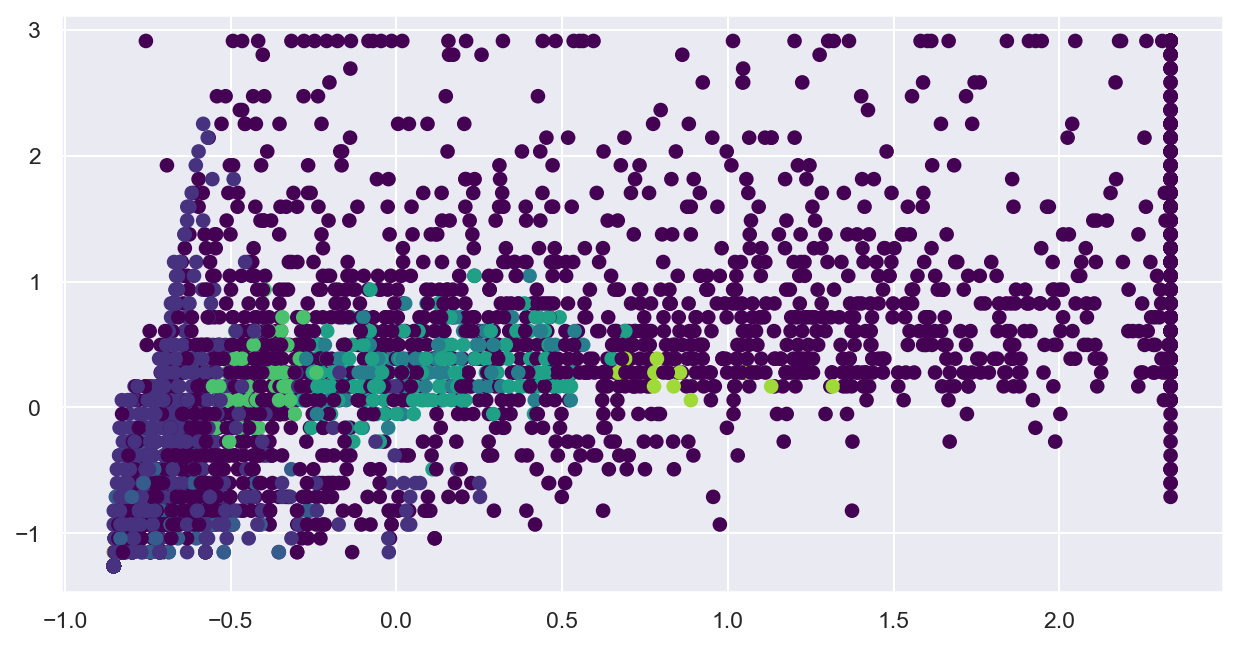

In [184]:
plt.scatter(x[:,5], x[:,6], c = ypred, cmap = 'viridis')

In [185]:
from sklearn.metrics import silhouette_score

In [186]:
silhouette_score(x, ypred)

-0.14895771979046746

Our score is much bad, we have to find proper value for eps and min samples via hyper parameter tuning

In [187]:
from sklearn.neighbors import NearestNeighbors

In [188]:
neigh = NearestNeighbors(n_neighbors = 3).fit(x)         
neigh

NearestNeighbors(n_neighbors=3)

In [189]:
neigh.kneighbors(x) 

(array([[0.        , 0.1271148 , 0.18043443],
        [0.        , 0.12672654, 0.13471398],
        [0.        , 0.20942913, 0.23342008],
        ...,
        [0.        , 0.23356857, 0.33602704],
        [0.        , 0.36229888, 0.44410451],
        [0.        , 0.00418102, 0.01159521]]),
 array([[   0,  378,  337],
        [   1,  363,    3],
        [   2,  338,   13],
        ...,
        [3996, 3877, 3800],
        [3997, 3623, 2763],
        [3998, 3491, 3455]], dtype=int64))

In [190]:
d,index = neigh.kneighbors(x)

In [191]:
d

array([[0.        , 0.1271148 , 0.18043443],
       [0.        , 0.12672654, 0.13471398],
       [0.        , 0.20942913, 0.23342008],
       ...,
       [0.        , 0.23356857, 0.33602704],
       [0.        , 0.36229888, 0.44410451],
       [0.        , 0.00418102, 0.01159521]])

In [192]:
index

array([[   0,  378,  337],
       [   1,  363,    3],
       [   2,  338,   13],
       ...,
       [3996, 3877, 3800],
       [3997, 3623, 2763],
       [3998, 3491, 3455]], dtype=int64)

In [193]:
d[:,1]

array([0.1271148 , 0.12672654, 0.20942913, ..., 0.23356857, 0.36229888,
       0.00418102])

In [194]:
distance = np.sort(d[:,1])        
distance

array([0.        , 0.        , 0.00331797, ..., 1.72263836, 1.85654914,
       2.09874831])

<Axes: >

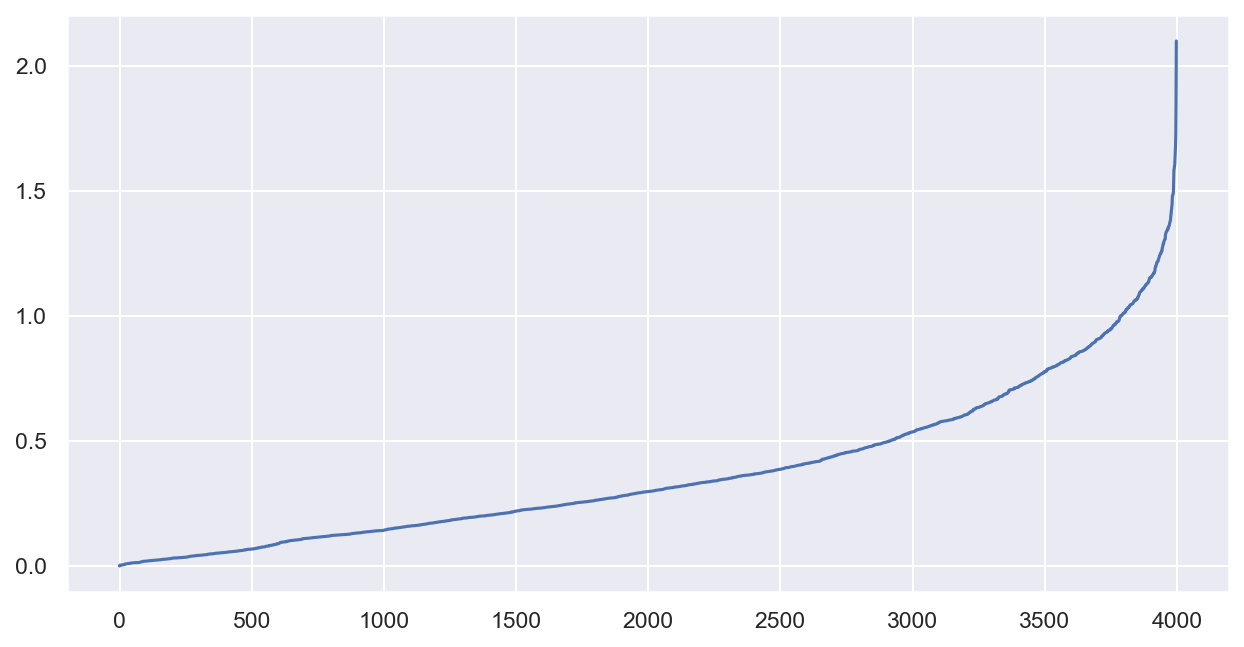

In [195]:
sns.lineplot(distance)      #k distance plot

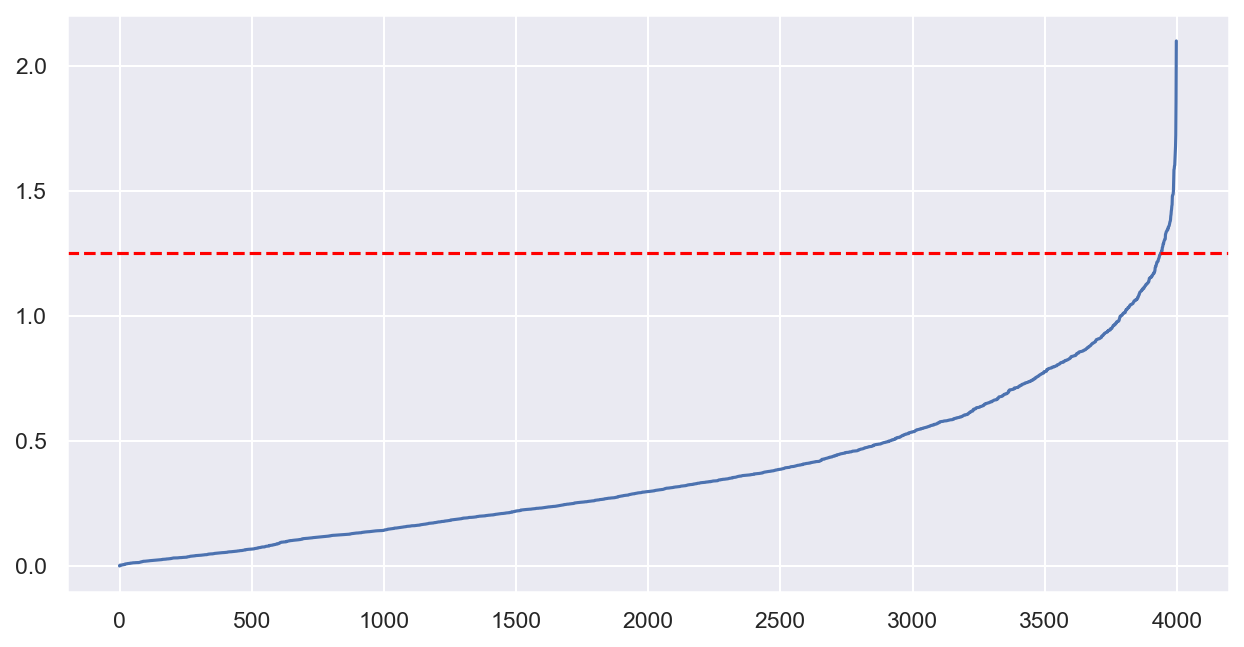

In [197]:
plt.plot(distance)
plt.axhline(y = 1.25, c = 'red', linestyle = '--')

From the graph, We have elbow point between 1 and 1.5. We have to check for two diff. eps values 1 and 1.25

In [196]:
db = DBSCAN(eps = 1, min_samples = 3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 3, 5, 0], dtype=int64)

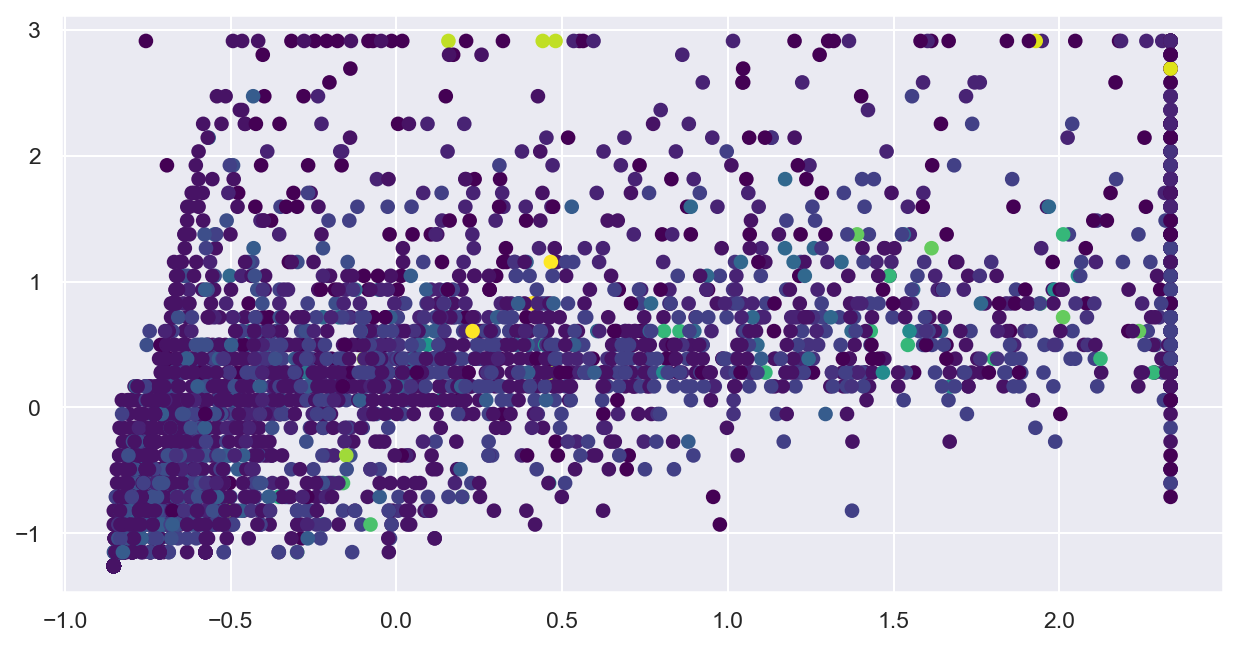

In [199]:
plt.scatter(x[:,5], x[:,6], c = yp, cmap = 'viridis')

In [200]:
silhouette_score(x, yp)

-0.002992347464574999

In [204]:
db = DBSCAN(eps = 1.25, min_samples = 3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

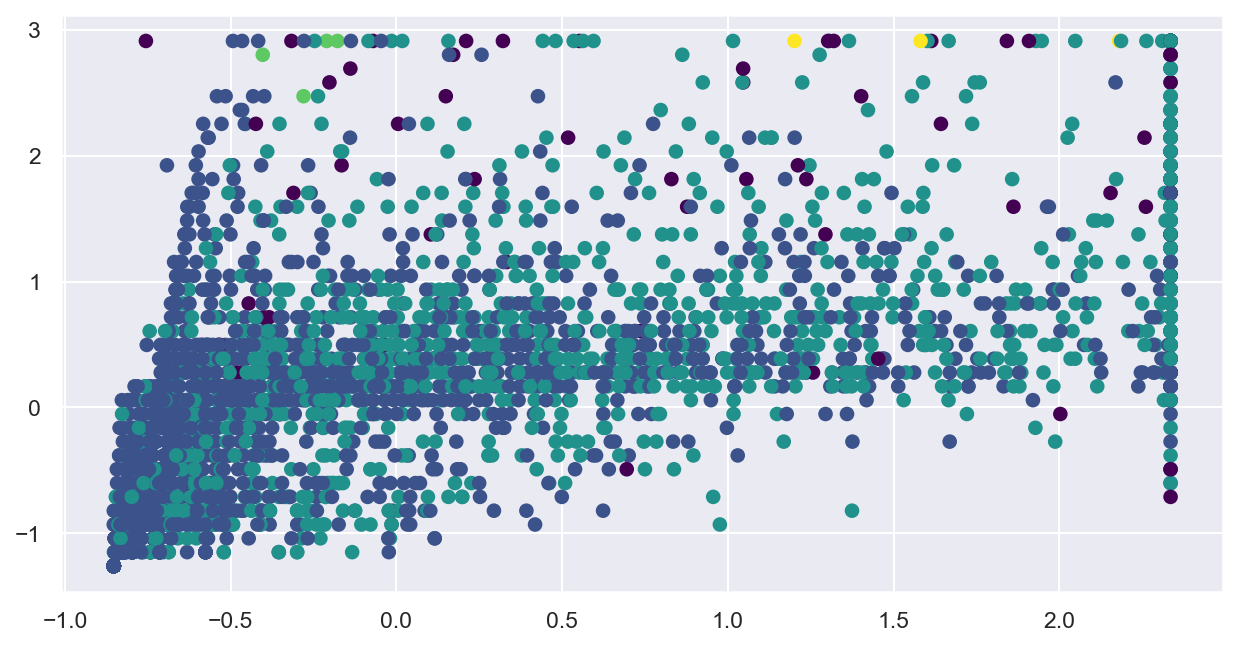

In [205]:
plt.scatter(x[:,5], x[:,6], c = yp, cmap = 'viridis')

In [206]:
silhouette_score(x, yp)

0.17341238233787679

looks like 1.25 is good , at least than 1. lets try even more increasing eps value.

In [208]:
db = DBSCAN(eps = 1.5, min_samples = 3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

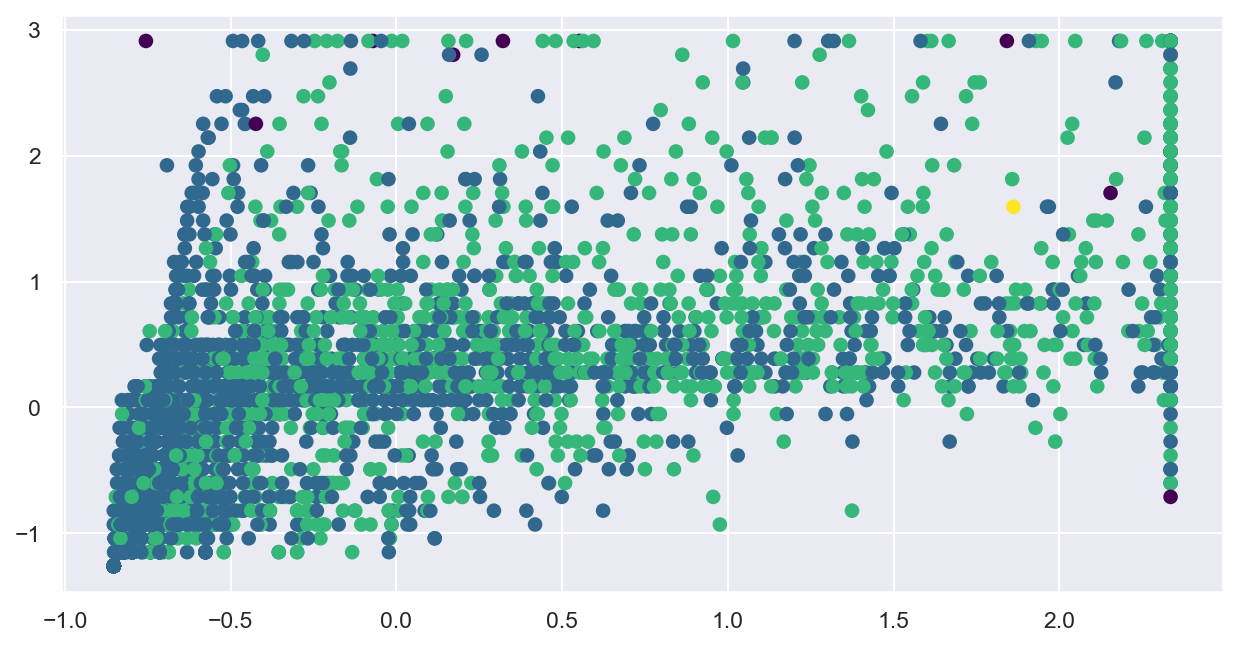

In [209]:
plt.scatter(x[:,5], x[:,6], c = yp, cmap = 'viridis')

In [210]:
silhouette_score(x, yp)

0.18741326531228636

In [212]:
db = DBSCAN(eps = 2, min_samples = 3)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [213]:
silhouette_score(x, yp)

0.21420688840410834

Now let's try another min sample value

In [219]:
db = DBSCAN(eps = 1.25, min_samples = 12)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [220]:
silhouette_score(x, yp)

0.18170012814599854

In [221]:
db = DBSCAN(eps = 1.5, min_samples = 12)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [222]:
silhouette_score(x, yp)

0.209379764801846

In [223]:
db = DBSCAN(eps = 2, min_samples = 12)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [224]:
silhouette_score(x, yp)

0.21420688840410834

Now, let's try for min sample = 22(no. of columns *2)

In [228]:
db = DBSCAN(eps = 1.25, min_samples = 22)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [229]:
silhouette_score(x, yp)

0.19606626412395398

In [230]:
db = DBSCAN(eps = 1.5, min_samples = 22)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [231]:
silhouette_score(x, yp)

0.21457477650040901

In [234]:
db = DBSCAN(eps = 1.75, min_samples = 22)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [235]:
silhouette_score(x, yp)

0.21226211829300712

will finalize EPS = 1.75 and min_Samples = 22 as our final model (Although 21% is not at all good accuracy, that's the best accuracy we are getting so far, so we have to choose that only.

In [236]:
db = DBSCAN(eps = 1.75, min_samples = 22)
yp = db.fit_predict(x)
yp

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

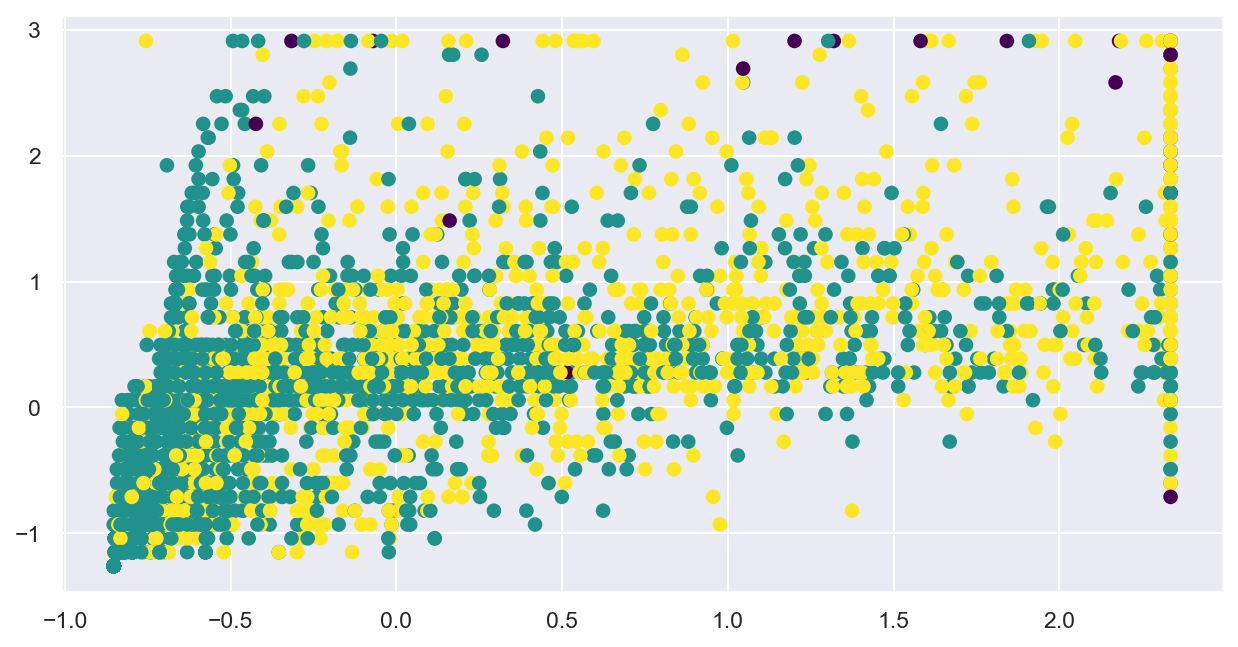

In [237]:
plt.scatter(x[:,5], x[:,6], c = yp, cmap = 'viridis')

In [238]:
silhouette_score(x, yp)

0.21226211829300712

In [239]:
df['Cluster'] = yp

In [240]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143.0,0.0,1,1.0,1.0,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0.0,1,1.0,1.0,215.0,2.0,0.0,0.0,6968,0,0
2,41354.0,0.0,1,1.0,1.0,4123.0,4.0,0.0,0.0,7034,0,0
3,14776.0,0.0,1,1.0,1.0,500.0,1.0,0.0,0.0,6952,0,0
4,97752.0,0.0,4,1.0,1.0,43300.0,26.0,777.5,2.5,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1,1.0,1.0,8525.0,4.0,200.0,1.0,1403,1,1
3995,64385.0,0.0,1,1.0,1.0,981.0,5.0,0.0,0.0,1395,1,1
3996,73597.0,0.0,3,1.0,1.0,25447.0,8.0,0.0,0.0,1402,1,1
3997,54899.0,0.0,1,1.0,1.0,500.0,1.0,500.0,1.0,1401,0,0


In [241]:
df['Cluster'].value_counts()

 0    2499
 1    1475
-1      25
Name: Cluster, dtype: int64

We can see , we have made three heterogeneous clusters.

In [242]:
df.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
-1,147151.440000,0.0,3.080000,1.0,1.0,42702.430000,32.120000,600.080000,1.940000,3895.160000,0.24
0,55243.741597,0.0,1.690276,1.0,1.0,9701.641857,8.927971,107.938976,0.361745,3817.369348,0.00
1,76798.561525,0.0,2.667797,1.0,1.0,24620.710678,15.428475,289.696949,0.957966,4632.633220,1.00


We can see that cluster 0 includes customers having least avg balance, bonus miles and flight miles etc... 
cluster 1 includes customers having medium avg balance, bonus miles and flight miles etc...
and cluster -1 includes customers having highest avg balance, bonus miles and flight miles etc...